In [1]:
!gdown https://drive.google.com/uc?id=1SZghBM39ZhwzDUNgt_omWx7L1KjvKWxE

Downloading...
From (original): https://drive.google.com/uc?id=1SZghBM39ZhwzDUNgt_omWx7L1KjvKWxE
From (redirected): https://drive.google.com/uc?id=1SZghBM39ZhwzDUNgt_omWx7L1KjvKWxE&confirm=t&uuid=cfd14675-3151-4969-8b4e-2ba18eb787eb
To: /content/images.zip
100% 33.9M/33.9M [00:00<00:00, 40.1MB/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.5 MB/s eta 0:00:00


In [3]:
!unzip datasets.zip

Archive:  datasets.zip
   creating: dataset/test/
   creating: dataset/test/images/
  inflating: dataset/test/images/31.png  
  inflating: dataset/test/images/32.png  
  inflating: dataset/test/images/33.png  
  inflating: dataset/test/images/34.png  
  inflating: dataset/test/images/35.png  
  inflating: dataset/test/images/36.png  
  inflating: dataset/test/images/37.png  
  inflating: dataset/test/images/38.png  
  inflating: dataset/test/images/39.png  
  inflating: dataset/test/images/40.png  
   creating: dataset/test/labels/
   creating: dataset/train/
   creating: dataset/train/images/
  inflating: dataset/train/images/1.png  
  inflating: dataset/train/images/10.png  
  inflating: dataset/train/images/11.png  
  inflating: dataset/train/images/12.png  
  inflating: dataset/train/images/13.png  
  inflating: dataset/train/images/14.png  
  inflating: dataset/train/images/15.png  
  inflating: dataset/train/images/16.png  
  inflating: dataset/train/images/17.png  
  inflating: 

In [6]:
import yaml

data = {
       "train" : './dataset/train',
        "val" : './dataset/val',
        "names" : {
                        "0":"car"
                  }
    }

with open('./data.yaml', 'w') as f :
    yaml.dump(data, f)

# check written file
with open('./data.yaml', 'r') as f :
    lines = yaml.safe_load(f)
    print(lines)

{'names': {'0': 'car'}, 'train': './dataset/train', 'val': './dataset/val'}


In [5]:
!pwd

/content


In [1]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
model.train(data='data.yaml', epochs=50, imgsz=640, batch=8, name='car-detection')

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car-detection2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a13698fef90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/car-detection2/weights/best.pt')
results = model('dataset/test/images/32.png', save=True, show=True)


image 1/1 /content/dataset/test/images/32.png: 320x640 1 car, 51.7ms
Speed: 2.7ms preprocess, 51.7ms inference, 6.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict


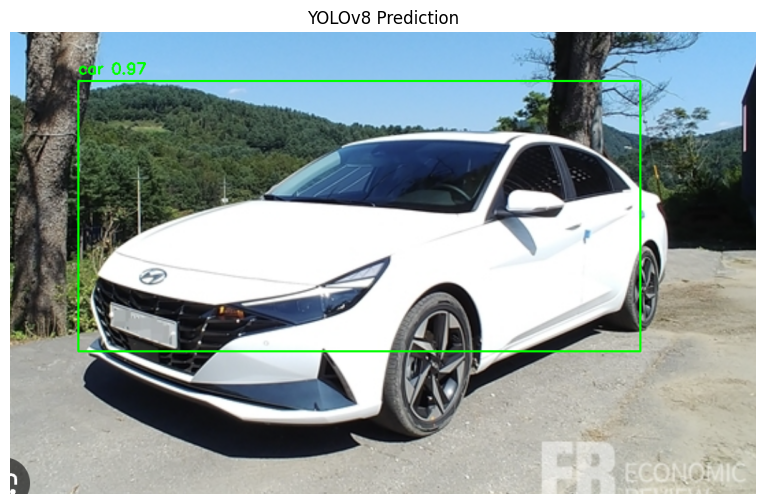

In [14]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img_path = "dataset/test/images/35.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 정보 얻기
boxes = results[0].boxes
annotated = img_rgb.copy()

# 시각화 (Matplotlib 사용)
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]

    # 박스 그리기
    cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 라벨 그리기
    text = f"{label} {conf:.2f}"
    cv2.putText(annotated, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# 6. 출력
plt.figure(figsize=(10, 6))
plt.imshow(annotated)
plt.axis("off")
plt.title("YOLOv8 Prediction")
plt.show()